# Flu Trends - Exploratory Data Analysis

Explore the dataset `flu_trends.csv` to uncover trends, seasonality and other hidden patterns within the data.

# Setup Notebook

## Import

In [1]:
# Import Standard Libraries
import numpy as np
import pandas as pd
from pathlib import Path
import os
from sklearn.linear_model import LinearRegression

# Import Package Modules
from src.general_utils.general_utils import (
    read_configuration, 
    read_data_from_config
)
from src.exploratory_data_analysis.exploratory_data_analysis_utils import (
    set_plot_characteristics,
    plot_time_series,
    plot_predictions_vs_time_series, 
    plot_moving_average
)

## Define Configuration

In [2]:
# Retrieve root path
root_path = Path(os.getcwd()).parents[1]

# Read configuration variables
config = read_configuration(root_path / 'configuration' / 'flu_trends_config.yaml')

# Extract configuration variables
dataset_config = config['dataset_config']
plot_characteristics = config['plot_characteristics']

[06/20/2024 16:09:22 - general_utils] INFO - read_configuration - Start
[06/20/2024 16:09:22 - general_utils] INFO - read_configuration - Reading /Users/s.porreca/Projects/TimeWarpForecast/configuration/flu_trends_config.yaml
[06/20/2024 16:09:22 - general_utils] INFO - read_configuration - Configuration file /Users/s.porreca/Projects/TimeWarpForecast/configuration/flu_trends_config.yaml read successfully
[06/20/2024 16:09:22 - general_utils] INFO - read_configuration - End


## Setup Plot Characteristics

In [3]:
set_plot_characteristics(plot_characteristics)

[06/20/2024 16:09:22 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - Start
[06/20/2024 16:09:22 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - Creating theme parameters
[06/20/2024 16:09:22 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - End


# Read Data

In [4]:
# Read dataset
dataset = read_data_from_config(dataset_config)

[06/20/2024 16:09:22 - general_utils] INFO - read_data_from_config - Start
[06/20/2024 16:09:22 - general_utils] INFO - read_data_from_config - Retrieve data path
[06/20/2024 16:09:22 - general_utils] INFO - build_path_from_list - Start
[06/20/2024 16:09:22 - general_utils] INFO - build_path_from_list - Retrieve root path to the project folder
[06/20/2024 16:09:22 - general_utils] INFO - build_path_from_list - Build the absolute path
[06/20/2024 16:09:22 - general_utils] INFO - build_path_from_list - End
[06/20/2024 16:09:22 - general_utils] INFO - read_data_from_config - Retrieved data path /Users/s.porreca/Projects/TimeWarpForecast/data/raw/flu_trends.csv
[06/20/2024 16:09:22 - general_utils] INFO - read_data_from_config - Reading data with date columns
[06/20/2024 16:09:22 - general_utils] INFO - read_data_from_config - Successfully read data with 366 rows and 131 columns
[06/20/2024 16:09:22 - general_utils] INFO - read_data_from_config - End


# Exploratory Data Analysis

## Plot Time Series

[06/20/2024 16:09:22 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[06/20/2024 16:09:22 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[06/20/2024 16:09:22 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[06/20/2024 16:09:23 - exploratory_data_analysis_utils] INFO - plot_time_series - Calling the plt.show()


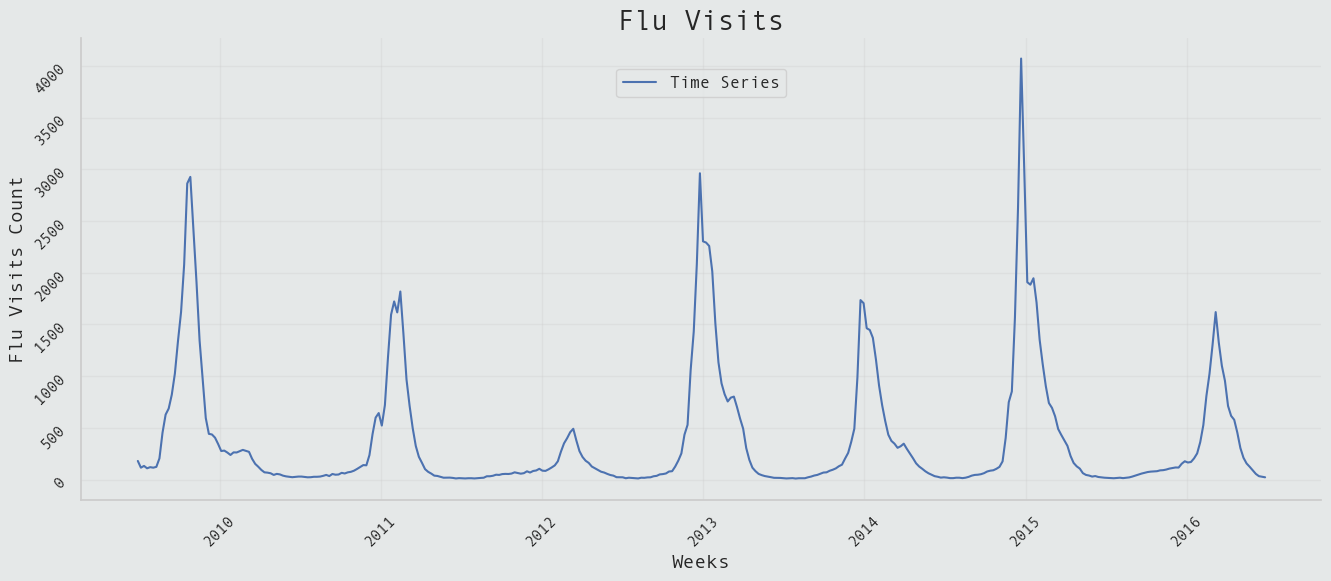

[06/20/2024 16:09:23 - exploratory_data_analysis_utils] INFO - plot_time_series - End


<Figure size 1600x600 with 0 Axes>

In [5]:
ax = plot_time_series(dataset, 
                      columns=('Week', 'FluVisits'), 
                      title='Flu Visits', 
                      labels=('Weeks', 'Flu Visits Count', 'Time Series'), 
                      to_plot=True)

## Moving Average

[06/20/2024 16:09:23 - exploratory_data_analysis_utils] INFO - plot_moving_average - Start
[06/20/2024 16:09:23 - exploratory_data_analysis_utils] INFO - plot_moving_average - Setting index
[06/20/2024 16:09:23 - exploratory_data_analysis_utils] INFO - plot_moving_average - Computing the moving average
[06/20/2024 16:09:23 - exploratory_data_analysis_utils] INFO - plot_moving_average - Plot time series
[06/20/2024 16:09:23 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[06/20/2024 16:09:23 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[06/20/2024 16:09:23 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[06/20/2024 16:09:23 - exploratory_data_analysis_utils] INFO - plot_time_series - End
[06/20/2024 16:09:23 - exploratory_data_analysis_utils] INFO - plot_moving_average - Plot moving average
[06/20/2024 16:09:23 - exploratory_data_analysis_utils] INFO - plot_moving_average - Set plot configurations


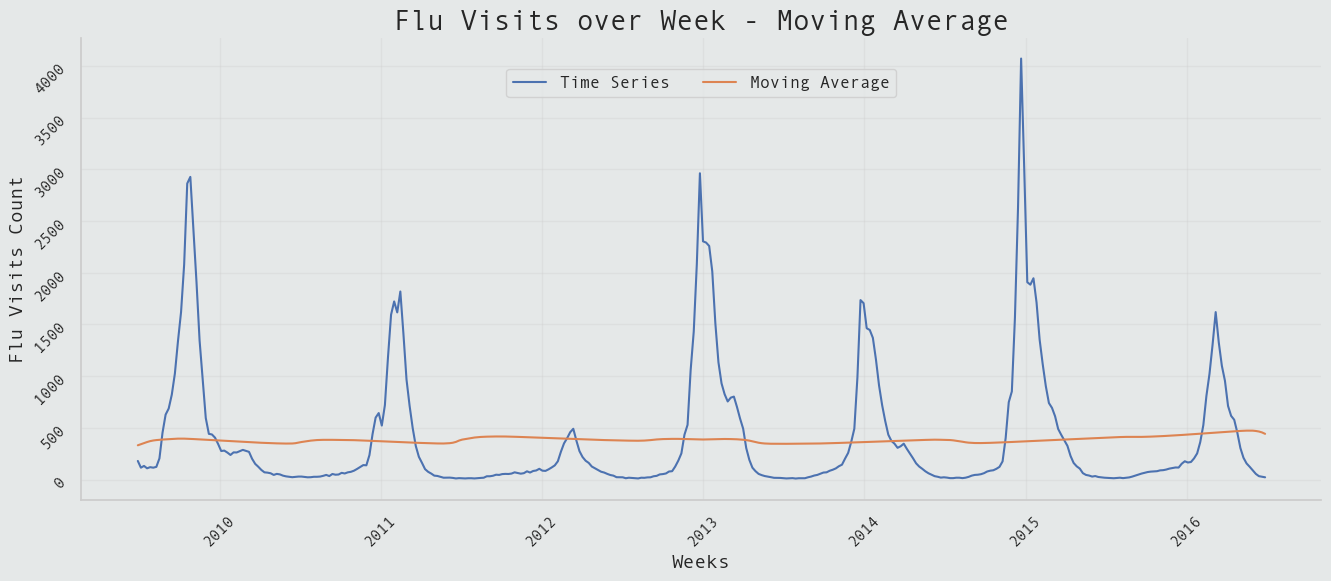

[06/20/2024 16:09:23 - exploratory_data_analysis_utils] INFO - plot_moving_average - End


<Axes: title={'center': 'Flu Visits over Week - Moving Average'}, xlabel='Weeks', ylabel='Flu Visits Count'>

<Figure size 1600x600 with 0 Axes>

In [6]:
plot_moving_average(time_series=dataset, 
                    rolling_settings={
                        'window': 365, 
                        'center': True, 
                        'min_periods': 183}, 
                    columns=('Week', 'FluVisits'), 
                    title='Flu Visits over Week - Moving Average', 
                    labels=('Weeks', 'Flu Visits Count', 'Moving Average'))

## Seasonality

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_seasonality(X,
                     y,
                     period,
                     freq,
                     ax=None):
    if ax is None:
        _, ax = plt.subplots()
        
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        errorbar=('ci', False),
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

In [24]:
dataset_copy = dataset.copy()

In [25]:
dataset_copy['day'] = dataset_copy['Week'].dt.dayofweek

In [23]:
dataset_copy['Week'].unique()

<DatetimeArray>
['2009-06-29 00:00:00', '2009-07-06 00:00:00', '2009-07-13 00:00:00',
 '2009-07-20 00:00:00', '2009-07-27 00:00:00', '2009-08-03 00:00:00',
 '2009-08-10 00:00:00', '2009-08-17 00:00:00', '2009-08-24 00:00:00',
 '2009-08-31 00:00:00',
 ...
 '2016-04-25 00:00:00', '2016-05-02 00:00:00', '2016-05-09 00:00:00',
 '2016-05-16 00:00:00', '2016-05-23 00:00:00', '2016-05-30 00:00:00',
 '2016-06-06 00:00:00', '2016-06-13 00:00:00', '2016-06-20 00:00:00',
 '2016-06-27 00:00:00']
Length: 366, dtype: datetime64[ns]

In [26]:
dataset_copy['day'].unique()

array([0], dtype=int32)

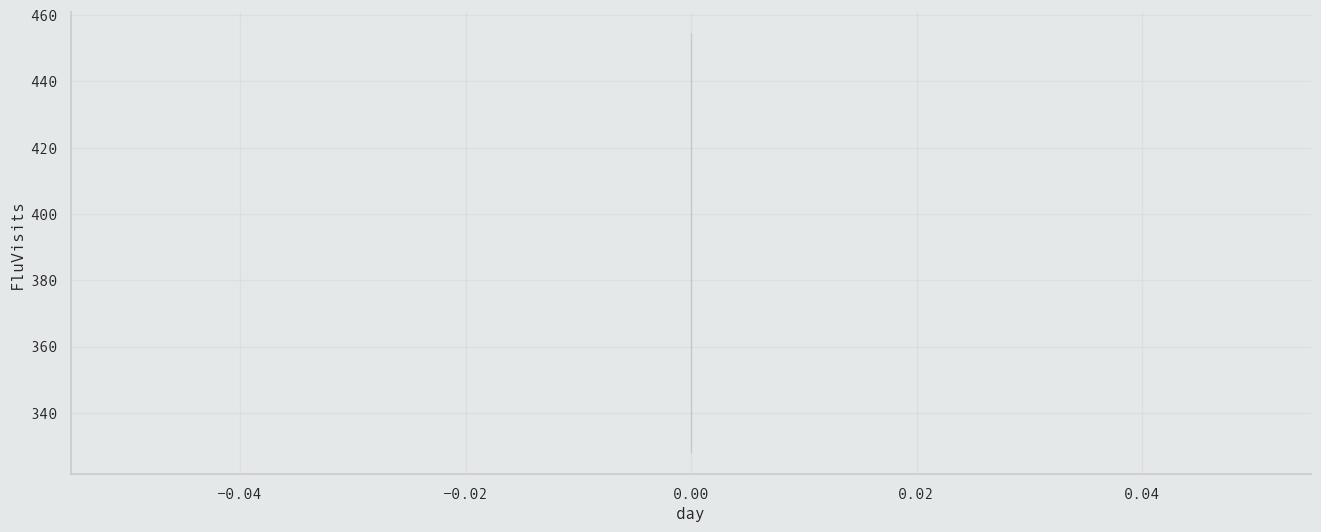

In [21]:
sns.lineplot(
        data=dataset_copy,
        x='day',
        y='FluVisits',
)

plt.show()


# Data Preparation

## Time-step Feature

In [ ]:
# Add 'Time' feature
dataset['Time'] = np.arange(len(dataset))

# Model Training

## Linear Regression with Time-step Feature

In [ ]:
# Define x, y
x = dataset.loc[:, ['Time']]
y = dataset.loc[:, ['FluVisits']]

# Instance model
model_lr_time_step = LinearRegression()

# Fit model
model_lr_time_step.fit(x, y)

# Produce prediction
predictions_lr_time_step = model_lr_time_step.predict(x)

# Show predictions
plot_predictions_vs_time_series(data=(dataset, predictions_lr_time_step.reshape(-1)),
                                columns=('Week', 'FluVisits'),
                                title='Flu Visits',
                                labels=('Weeks', 'Flu Visits Count', 'Predictions'), 
                                to_plot=True)